## Analysis: 

* Based on the Box plot, Capomulin and Ramicane are more effective at reducing tumor size than Infubinol and Ceftamin. This is also shown through the bar chart due both treatment having the highest number of timepoints associated with them. 
    
* It was clear that Capomulin had a significant impact on mouse X401. After 45 days, Mouse X401's tumor had shrunk from 45mm down to 28 mm which shows a huge reduction in size. 
    
* The strong positive correlation in the linear regression plot is also very obvious with a 0.84 z-score. The left to right upward movement of the graph means that the more weight that the mice had, the larger the tumor was. 

In [22]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data dn Display the data table for preview
mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
mouse_study.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [23]:
#Get a full count of all data points 
mouse_study.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [24]:
#Get a full count of all mice that are in the study 
num_mice = len(mouse_study["Mouse ID"].value_counts())
mice_count = pd.DataFrame({"Total Mice":[num_mice]})
mice_count

,Total Mice
0,249


In [25]:
# Counting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_study["MouseID_Timepoint"] = mouse_study["Mouse ID"].map(str) + mouse_study["Timepoint"].map(str)
mouse_study["MouseID_Timepoint"].duplicated().sum()
mouse_study.duplicated(subset = ["MouseID_Timepoint"]).sum()

5

In [26]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_study.drop_duplicates(subset = ["MouseID_Timepoint"])
clean_mouse  = clean_mouse.set_index("MouseID_Timepoint")
clean_mouse 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
MouseID_Timepoint,,,,,,,,
k4030,k403,Ramicane,Male,21,16,0,45.000000,0
k4035,k403,Ramicane,Male,21,16,5,38.825898,0
k40310,k403,Ramicane,Male,21,16,10,35.014271,1
k40315,k403,Ramicane,Male,21,16,15,34.223992,1
k40320,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
z96925,z969,Naftisol,Male,9,30,25,63.145652,2
z96930,z969,Naftisol,Male,9,30,30,65.841013,3
z96935,z969,Naftisol,Male,9,30,35,69.176246,4


In [27]:
# Checking the number of mice in the clean DataFrame.
clean_mouse.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
var = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_mouse.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

mouse_summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": var, "Std_Dev": std, "SEM": sem})
mouse_summary


,Mean,Median,Variance,Std_Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [29]:
#Isolated Drug Regiment and Timepoint Data
sum = clean_mouse.groupby('Drug Regimen')['Timepoint'].sum()
drug_summary = pd.DataFrame({"Timepoint": sum})
drug_summary

,Timepoint
Drug Regimen,
Capomulin,4960
Ceftamin,3515
Infubinol,3235
Ketapril,3705
Naftisol,3650
Placebo,3380
Propriva,2665
Ramicane,4885
Stelasyn,3480


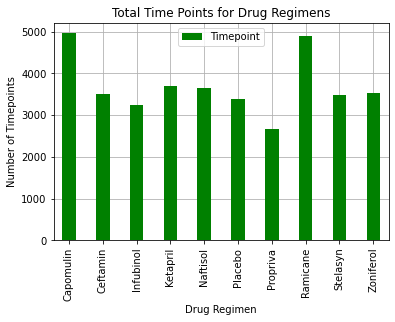

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar_panda = drug_summary.plot(kind='bar',width =0.4, color = "g", zorder=3)

bar_panda.set_xlabel("Drug Regimen")
bar_panda.set_ylabel("Number of Timepoints")
bar_panda.set_title("Total Time Points for Drug Regimens")

plt.grid(zorder=0)
plt.show()
plt.tight_layout()

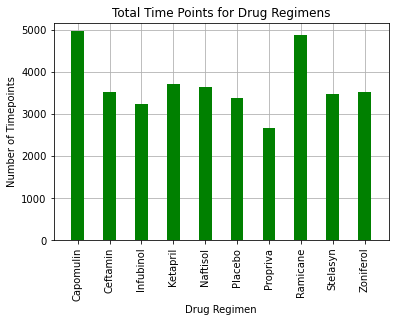

<Figure size 432x288 with 0 Axes>

In [31]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

counts = clean_mouse.groupby('Drug Regimen')['Timepoint'].sum()
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]

x_axis = np.arange(len(counts))
plt.bar(x_axis, counts, color='g', width = 0.4, zorder=3)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(counts)+200)

plt.xticks(rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Total Time Points for Drug Regimens")

plt.grid(zorder=0)
plt.show()
plt.tight_layout()

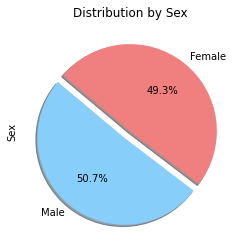

In [32]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mouse = clean_mouse["Sex"].value_counts()
colors = ["lightskyblue","lightcoral"]
explode = (0.1, 0)
sex_mouse.plot(kind='pie', y="", shadow=True, startangle=140, title="Distribution by Sex",
               colors=colors, explode=explode,autopct="%1.1f%%")


Text(0, 0.5, '')

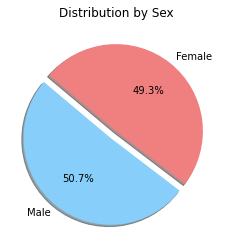

In [33]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
data = clean_mouse['Sex'].value_counts()
colors = ["lightskyblue","lightcoral"]
explode = (0.1, 0)
pie_plot = data.plot.pie(autopct="%1.1f%%", shadow=True, startangle=140,explode=explode, colors=colors, title='Distribution by Sex')
pie_plot.set_ylabel('')


## Quartiles, Outliers and Boxplots

In [34]:
#Creating a groupby in order to isolate greatest timepoints in mice
max_tp_df = pd.DataFrame(clean_mouse.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

merged_df = pd.merge(clean_mouse, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [35]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Create a for loop for each drug 
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate interquartile range (IQR) 
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


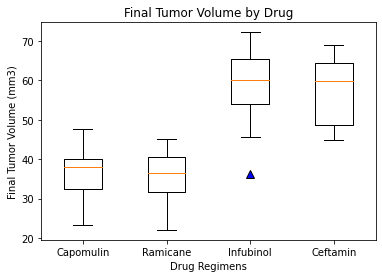

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker='^', markerfacecolor='b', markersize=8)

plt.boxplot(drug_values, flierprops=flierprops)

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimens')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

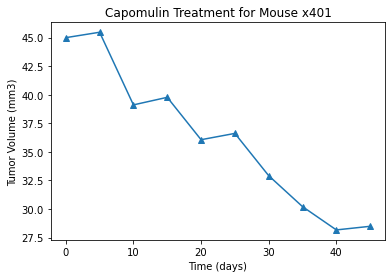

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = clean_mouse.loc[clean_mouse['Mouse ID'] == 'x401']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = '^')


plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment for Mouse x401")


plt.show()


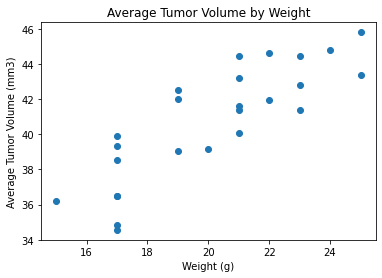

In [38]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']

plt.scatter(x, y)

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

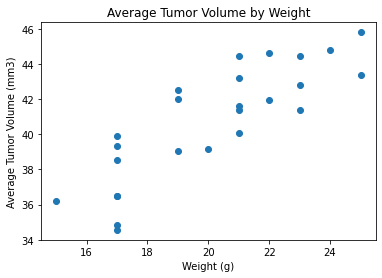

The correlation between weight and average tumor volume
of mice being subjected to the Capomulin regimen is 0.84.


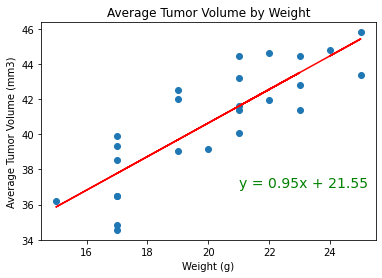

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_df = clean_mouse.loc[clean_mouse['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['Average Tumor Volume']
plt.scatter(x, y)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()

# Calculate the correlation coefficient 
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
of mice being subjected to the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(21,37),fontsize=14,color="green")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()